<a href="https://colab.research.google.com/github/maengjulie/Heterogeneity-Activity-Recognition/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [ ]:
train_acc_x = pd.read_csv('~/Downloads/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt',
            header=None, delim_whitespace=True, delimiter=',').values
train_acc_y = pd.read_csv('~/Downloads/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt',
            header=None, delim_whitespace=True, delimiter=',').values
train_acc_z = pd.read_csv('~/Downloads/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt',
            header=None, delim_whitespace=True, delimiter=',').values

test_acc_x = pd.read_csv('~/Downloads/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt',
            header=None, delim_whitespace=True, delimiter=',').values
test_acc_y = pd.read_csv('~/Downloads/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt',
            header=None, delim_whitespace=True, delimiter=',').values
test_acc_z = pd.read_csv('~/Downloads/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt',
            header=None, delim_whitespace=True, delimiter=',').values

In [ ]:
loaded_x = np.concatenate((train_acc_x, test_acc_x))
loaded_y = np.concatenate((train_acc_y, test_acc_y))
loaded_z = np.concatenate((train_acc_z, test_acc_z))

In [ ]:
X_loaded = list()

X_loaded.append(loaded_x)
X_loaded.append(loaded_y)
X_loaded.append(loaded_z)

X_loaded = np.dstack(X_loaded)

X_loaded.shape

(10299, 128, 3)

In [ ]:
y_acc_train = pd.read_csv('~/Downloads/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',
                        header = None, delim_whitespace = True).values
y_acc_test = pd.read_csv('~/Downloads/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',
                        header = None, delim_whitespace = True).values

y_loaded = np.concatenate((y_acc_train, y_acc_test))

y_loaded.shape

(10299, 1)

In [ ]:
trainX, testX, trainy, testy = train_test_split(X_loaded, y_loaded, test_size=0.30)
trainy = trainy - 1
testy = testy - 1
trainy = tf.keras.utils.to_categorical(trainy)
testy = tf.keras.utils.to_categorical(testy)
print(trainX.shape, trainy.shape, testX.shape, testy.shape)

(7209, 128, 3) (7209, 6) (3090, 128, 3) (3090, 6)


## Model No. 1

In [ ]:
verbose, epochs, batch_size = 0, 50, 64
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

model_1 = Sequential()
model_1.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(n_outputs, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_1.fit(trainX, trainy, epochs=50, batch_size=64, validation_split = 0.3, verbose=1)

Epoch 1/50
79/79 [==============================] - 9s 119ms/step - loss: 1.3007 - accuracy: 0.4413 - val_loss: 1.2041 - val_accuracy: 0.4767
Epoch 2/50
79/79 [==============================] - 8s 99ms/step - loss: 1.0714 - accuracy: 0.5273 - val_loss: 1.0235 - val_accuracy: 0.5525
Epoch 3/50
79/79 [==============================] - 8s 103ms/step - loss: 1.1290 - accuracy: 0.5200 - val_loss: 1.4849 - val_accuracy: 0.4235
Epoch 4/50
79/79 [==============================] - 8s 102ms/step - loss: 1.2177 - accuracy: 0.4546 - val_loss: 1.1870 - val_accuracy: 0.4706
Epoch 5/50
79/79 [==============================] - 8s 105ms/step - loss: 1.1015 - accuracy: 0.5212 - val_loss: 1.1055 - val_accuracy: 0.5289
Epoch 6/50
79/79 [==============================] - 8s 102ms/step - loss: 1.0626 - accuracy: 0.5392 - val_loss: 1.0646 - val_accuracy: 0.5423
Epoch 7/50
79/79 [==============================] - 8s 105ms/step - loss: 1.0191 - accuracy: 0.5511 - val_loss: 1.0101 - val_accuracy: 0.5576
Epoch 8

In [ ]:
_, accuracy = model_1.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print(accuracy)

0.9378640651702881


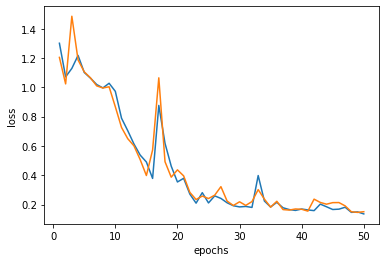

In [ ]:
# Loss
epochs = np.arange(1,51)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

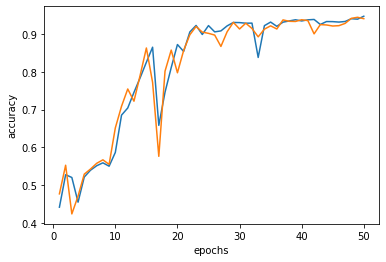

In [ ]:
# Accuracy

epochs = np.arange(1,51)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## Model No. 2

In [ ]:
verbose, epochs, batch_size = 0, 50, 64
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

model_2 = Sequential()
model_2.add(LeakyReLU(0.2))
model_2.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(n_outputs, activation='softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_2.fit(trainX, trainy, epochs=50, batch_size=64, validation_split = 0.3, verbose=0)

In [ ]:
_, accuracy = model_2.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print(accuracy)

0.9213592410087585


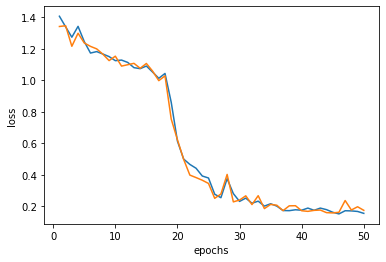

In [ ]:
# Loss
epochs = np.arange(1,51)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

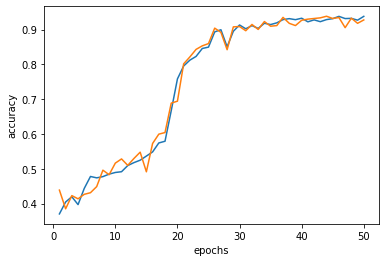

In [ ]:
# Accuracy

epochs = np.arange(1,51)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## Model No. 3

In [ ]:
verbose, epochs, batch_size = 0, 50, 64
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

model_3 = Sequential()
model_3.add(LeakyReLU(0.2))
model_3.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model_3.add(Dropout(0.5))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(n_outputs, activation='softmax'))
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_3.fit(trainX, trainy, epochs=50, batch_size=64, validation_split = 0.3, verbose=0)

In [ ]:
_, accuracy = model_3.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print(accuracy)

0.9226537346839905


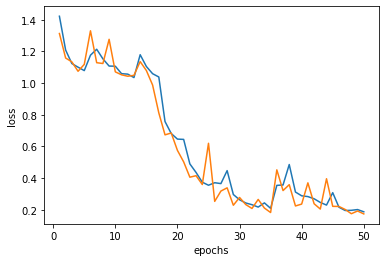

In [ ]:
# Loss
epochs = np.arange(1,51)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

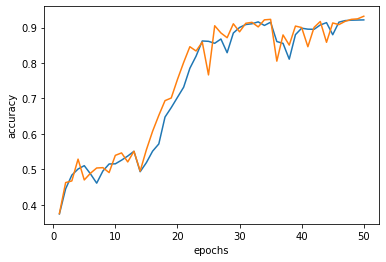

In [ ]:
# Accuracy

epochs = np.arange(1,51)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## Model No. 4

In [ ]:
verbose, epochs, batch_size = 0, 50, 64
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

model_4 = Sequential()
model_4.add(layers.Conv1D(32, 5, activation = 'relu', input_shape = (n_timesteps, n_features)))
model_4.add(layers.MaxPooling1D(3))
model_4.add(LeakyReLU(0.2))
model_4.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model_4.add(Dense(100, activation='relu'))
model_4.add(Dense(n_outputs, activation='softmax'))
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_4.fit(trainX, trainy, epochs=50, batch_size=64, validation_split = 0.3, verbose=0)

In [ ]:
_, accuracy = model_4.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print(accuracy)

0.924271821975708


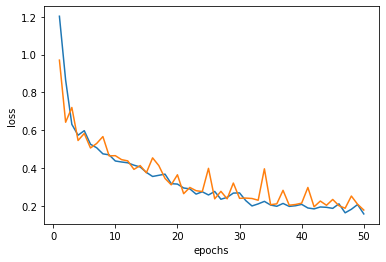

In [ ]:
# Loss
epochs = np.arange(1,51)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

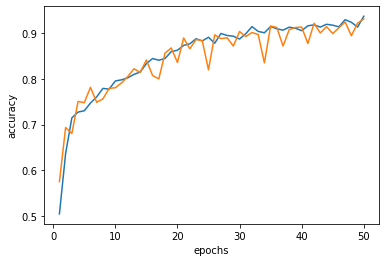

In [ ]:
# Accuracy

epochs = np.arange(1,51)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## Model No. 5

In [ ]:
verbose, epochs, batch_size = 0, 50, 64
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

model_5 = Sequential()
model_5.add(layers.GRU(4, return_sequences=True))
model_5.add(LeakyReLU(0.2))
model_5.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model_5.add(Dense(100, activation='relu'))
model_5.add(Dense(n_outputs, activation='softmax'))
model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_5.fit(trainX, trainy, epochs=50, batch_size=64, validation_split = 0.3, verbose=0)

In [ ]:
_, accuracy = model_5.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print(accuracy)

0.9297734498977661


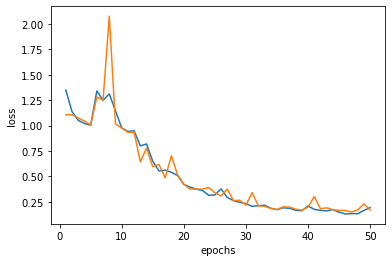

In [ ]:
# Loss
epochs = np.arange(1,51)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

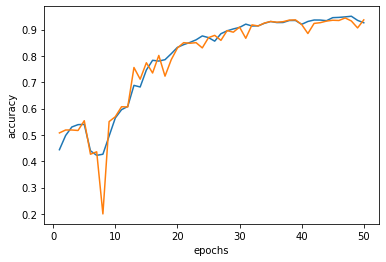

In [ ]:
# Accuracy

epochs = np.arange(1,51)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## Testing

In [ ]:
show_x = pd.read_csv('~/Downloads/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt',
            header=None, delim_whitespace=True, delimiter=',').sample(n=5).values
show_y = pd.read_csv('~/Downloads/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt',
            header=None, delim_whitespace=True, delimiter=',').sample(n=5).values
show_z = pd.read_csv('~/Downloads/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt',
            header=None, delim_whitespace=True, delimiter=',').sample(n=5).values

In [ ]:
X_show = list()

X_show.append(show_x)
X_show.append(show_y)
X_show.append(show_z)

X_show = np.dstack(X_show)

X_show.shape

In [ ]:
model_4.predict_classes(X_show)